In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df_accounts = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\accounts.csv',delimiter=";",low_memory=False)
df_opp = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\opportunities.csv',delimiter=";",low_memory=False)
df_fx = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\fx.csv',delimiter=";",low_memory=False)
df_products = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\products.csv',delimiter=";",low_memory=False)

In [4]:
df_accounts_bkp = df_accounts.copy()
df_opp_bkp = df_opp.copy()
df_fx_bkp = df_fx.copy()
df_products_bkp = df_products.copy()

In [5]:
df_opp_bkp['SnapshotGenDate'] = pd.to_datetime(df_opp_bkp['SnapshotGenDate'])
df_opp_bkp['created_date'] = pd.to_datetime(df_opp_bkp['created_date'])
df_opp_bkp['close_date'] = pd.to_datetime(df_opp_bkp['close_date'])

In [6]:
df_accounts_bkp['SnapshotGenDate'] = pd.to_datetime(df_accounts_bkp['SnapshotGenDate'])

1. Cleaning data

In [7]:
opportunities = df_opp_bkp[df_opp_bkp['stage'].isin(['Open', 'Acknowledged', 
                                                                 'Suspect', 'Potential', 
                                                                 'Probable'])]['opportunity_id'].unique()
cut = (df_opp_bkp['created_date']>=df_opp_bkp['SnapshotGenDate']-pd.DateOffset(years=3))
cut &= (df_opp_bkp['created_date']<=df_opp_bkp['SnapshotGenDate'])
cut &= (df_opp_bkp['close_date']>=df_opp_bkp['SnapshotGenDate']-pd.DateOffset(years=1))
cut &= (df_opp_bkp['close_date']<=df_opp_bkp['SnapshotGenDate']+pd.DateOffset(years=2))
cut &= (df_opp_bkp['type_group'].isin(['Software', 'Subscription']))
cut &= (df_opp_bkp['opportunity_id'].isin(opportunities))
cut &= (df_opp_bkp['SnapshotGenDate']<'2022-03-31')
cut &= (df_opp_bkp['close_date']<=df_opp['SnapshotGenDate'].max())
df_opp_bkp = df_opp_bkp[cut]

In [8]:
#this cell does not appear to change the number of rows in df_opp_bkp
df_opp_bkp.sort_values(['opportunity_id','SnapshotGenDate', 'today'],inplace=True)
df_opp_bkp.drop_duplicates(subset=['opportunity_id','SnapshotGenDate'], keep='last',inplace=True)

In [9]:
df_accounts_bkp.sort_values(['account_id','SnapshotGenDate', 'today'],inplace=True)
df_accounts_bkp.drop_duplicates(subset=['account_id','SnapshotGenDate'], keep='last',inplace=True)

In [10]:
df_products_bkp.drop_duplicates(subset=['Product_ID__c'], keep='last',inplace=True)

In [11]:
df_opp_bkp.drop(['Unnamed: 0','business_unit','engagement_type','attachment_type','type','won_loss_competitor',
               'close_date_month','fiscal_quarter','fiscal_year','sales_committed_opportunity',
               'oppty_exec_sponsor','Type_Group__c','request_rfp_assistance','today', 'date_to_assigned', 'days_to_assigned'],axis=1,inplace=True)

In [12]:
df_accounts_bkp.drop(['Unnamed: 0','market_segment','customer_market_segment','account_executive_sponsor',
                  'outstanding_AR_balance_30days','credit_status','do_not_contact','customer_payment_terms',
                  'last_sn_case_createddate','engaged_people','num_of_emails','engagement_minutes__3_mo__', 'etldate'],axis=1,inplace=True)

In [13]:
df_products_bkp.drop(['Visible_on_Portal__c','Third_Party_Product__c','SBQQ__QuantityEditable__c','SBQQ__IncludeInMaintenance__c','SBQQ__HasConfigurationAttributes__c','SBQQ__CostEditable__c','Renewable__c','Not_Individually_Sellable__c','NPI_for_OKR__c','Modification_Support_Available__c','Machine_Learning__c','Luminate__c','LastModifiedById','Is_SaaS_Bundle__c','Is_Not_Maintenance_Sales_Item__c','IsActive','Inherit_Sales_Item_from_Parent__c','IPP_Eligible__c','IPP_EligibleF__c','Hide_in_SF_CPQ_Catalog_License__c','Hide_From_CPQ_Catalog_Support_Services__c','Hide_From_CPQ_Catalog_Software__c','Hide_From_CPQ_Catalog_Subscription__c','ETL_CreatedYear','Do_Not_Apply_SSWM_Factor__c','Deferred_Revenue__c','CreatedById','CanUseRevenueSchedule','Available_in_SF_CPQ__c','Apttus_Config2__Icon__c','Apttus_Config2__HasOptions__c','Support_Eligible__c','SBQQ__Taxable__c',
                  'SBQQ__ReconfigurationDisabled__c','SBQQ__PricingMethodEditable__c',
                  'SBQQ__PriceEditable__c','Apttus_Config2__ExcludeFromSitemap__c',
       'Apttus_Config2__HasSearchAttributes__c',
       'Apttus_Config2__ShowTabView__c', 'Bundle__c', 'Can_run_on_Cloud__c',
       'CurrencyIsoCode', 'ETLDate', 'ETLtimestamp',
       'Has_option_price_floor__c', 'Hide_in_SF_CPQ_Catalog_Subscription__c',
       'IsArchived', 'IsDeleted', 'Is_Platinum_Points_Updated__c',
       'Metrics_Required__c', 'NPI__c', 'Native_SaaS__c', 'SBQQ__Component__c',
       'SBQQ__CustomConfigurationRequired__c', 'SBQQ__DescriptionLocked__c',
       'SBQQ__EnableLargeConfiguration__c', 'SBQQ__ExcludeFromMaintenance__c',
       'SBQQ__ExcludeFromOpportunity__c', 'SBQQ__ExternallyConfigurable__c',
       'SBQQ__HasConsumptionSchedule__c', 'SBQQ__Hidden__c',
       'SBQQ__HidePriceInSearchResults__c', 'SBQQ__NewQuoteGroup__c',
       'SBQQ__NonDiscountable__c', 'SBQQ__NonPartnerDiscountable__c',
       'SBQQ__Optional__c','Apttus_Config2__HasDefaults__c'],axis=1,inplace=True)

In [14]:
df_opp_bkp['future_stage'] = df_opp_bkp.groupby('opportunity_id')['stage'].shift(-1)
df_opp_bkp['future_close_date'] = df_opp_bkp.groupby('opportunity_id')['close_date'].shift(-1)

In [15]:
df_opp_bkp.dropna(subset=['future_stage'],inplace=True)

In [16]:
df_merged = pd.merge(df_opp_bkp, df_accounts_bkp, on=['account_id','SnapshotGenDate'], how='left')

2. Creating target

In [17]:
target = df_merged['future_stage'].isin(['Won','Firm'])
df_merged['target']= target.astype(int)
print(df_merged['target'])

0        0
1        0
2        0
3        0
4        0
        ..
27217    0
27218    0
27219    0
27220    0
27221    0
Name: target, Length: 27222, dtype: int32


In [18]:
df_merged.drop(labels=['future_stage','future_close_date'],axis=1,inplace=True)

In [19]:
#create column that counts the number of won opportunities that an account has had
#it seems this new column decreases purity for decision tree slightly
past_won_opp = df_merged.groupby(['account_id','stage'])['stage'].count().xs('Won', level=1)
df_merged = pd.merge(df_merged, past_won_opp, left_on='account_id', right_on='account_id', right_index=True, how='left')
df_merged.rename(columns = {'stage_x':'stage','stage_y':'acc_won_count'}, inplace = True)

In [20]:
#adding this appears to cause a large drop in purity?
df_merged.drop(df_merged[df_merged['stage'].isin(['Firm','Won','Loss','No Decision','Abandoned'])].index,inplace=True)

3. Creating datetime delta features

In [21]:
#previously dropped 'date_to_assigned' because it appears to have around 0.99 correlation with 'date_to_acknowledged'
df_merged['date_to_acknowledged'] = pd.to_datetime(df_merged['date_to_acknowledged'])
df_merged['date_to_probable'] = pd.to_datetime(df_merged['date_to_probable'])
df_merged['date_to_suspect'] = pd.to_datetime(df_merged['date_to_suspect'])
df_merged['last_activity'] = pd.to_datetime(df_merged['last_activity'])
df_merged['etldate'] = pd.to_datetime(df_merged['etldate'])

In [22]:
df_merged['days_acknowledged_to_suspect']=(df_merged['date_to_suspect']-df_merged['date_to_acknowledged']).dt.days
df_merged['days_open_to_probable']=(df_merged['date_to_probable']-df_merged['created_date']).dt.days
#df_merged['days_acknowledged_to_probable']=(df_merged['date_to_probable']-df_merged['date_to_acknowledged']).dt.days #DON'T NEED? HIGH CORR WITH DAYS OPEN TO PROBABLE?
# scenarios:
# opportunity not won yet/lost - input roughly infinity
# opportunity skips stages - input delta between last stage and current stage

In [23]:
df_merged['days_open_to_close']=(df_merged['created_date']-df_merged['close_date']).dt.days
df_merged['days_open_to_lastactivity']=(df_merged['created_date']-df_merged['last_activity']).dt.days
df_merged['days_open_to_etl']=(df_merged['created_date']-df_merged['etldate']).dt.days
#df_merged['days_open_to_futureclose']=(df_merged['created_date']-df_merged['future_close_date']).dt.days
#df_merged['days_open_to_SGD']=(df_merged['created_date']-df_merged['SnapshotGenDate']).dt.days

In [24]:
df_merged.drop(['days_suspect_to_probable','outstanding_AR_Balance','date_to_acknowledged','date_to_probable','date_to_suspect', 'theater_country', 'customer_industry', 'customer_tier_level', 'account_credit_limit', 'customer_since_date', 'today', 'ced_status', 'last_face_to_face_meeting', 'sales_growth', 'ad_clicks', 'LastModifiedDate_y', 'LastModifiedDate_x', 'peopleai__TotalTimeSpent__c', 'Primary_Master_Product_Code__c', 'Primary_Master_Product__c', 'mkto_sales_insight', 'highest_contact_level', 'sub_industry', 'opportunity_readiness_scorecard', 'agreement_status', 'opportunity_industry', 'other_competitor', 'theater', 'date_approved_for_full_pursuit_next_step', 'additional_license', 'close_date', 'last_activity', 'etldate', 'created_date'],axis=1,inplace=True)

In [25]:
df_merged.drop(['account_id','opportunity_id'],axis=1,inplace=True)

In [26]:
df_merged.drop(index=25809,axis=0,inplace=True)

In [27]:
df_merged['fiscal_period'] = df_merged['fiscal_period'].str[5:]

In [28]:
df_merged['fiscal_period']= df_merged['fiscal_period'].astype(int)
df_merged['CHS_Score']= df_merged['CHS_Score'].str.split('(').str[1].str.split('%').str[0].astype(float)

4. Imputating null values

In [29]:
#count number of columns filled for each row before imputing values to create new column
df_merged['sum_nulls']=df_merged.isnull().sum(axis=1)

In [30]:
# imputing null values because feature importance algorithm appears to not accept null values
# perhaps also want to combine some categories
# perhaps some columns can use null as separate category?
# perhaps some numerical columns need other imputation than mean?
#df_merged['amount__converted'].fillna(value=df_merged['amount__converted'].mean(),inplace=True)
df_merged['amount__converted'].fillna(value=df_merged['amount__converted'].mean(),inplace=True)
df_merged['days_to_acknowledged'].fillna(value=df_merged['days_to_acknowledged'].mean(),inplace=True)
df_merged['deal_size_band__in__usd'].fillna(value='1_<125K',inplace=True)
df_merged['opportunity_category'].fillna(value='Other',inplace=True)
df_merged['stage'].fillna(value='Open',inplace=True)
df_merged['primary_industry'].fillna(value='Manufacturing',inplace=True)
df_merged['amount_at_suspect__converted'].fillna(value=df_merged['amount_at_suspect__converted'].mean(),inplace=True)
df_merged['days_open_to_suspect'].fillna(value=df_merged['days_open_to_suspect'].mean(),inplace=True)
#df_merged['days_suspect_to_probable'].fillna(value=df_merged['days_suspect_to_probable'].mean(),inplace=True)
df_merged['Aggregate_PEB_Value__c'].fillna(value=df_merged['Aggregate_PEB_Value__c'].mean(),inplace=True)
df_merged['primary_industry'].fillna(value='Potential Azure',inplace=True)
df_merged['CHS_Score'].fillna(value=df_merged['CHS_Score'].mean(),inplace=True)
df_merged['account_type'].fillna(value='Client',inplace=True)
df_merged['days_since_last_case'].fillna(value=df_merged['days_since_last_case'].mean(),inplace=True)
df_merged['days_since_BY_customer'].fillna(value=df_merged['days_since_BY_customer'].mean(),inplace=True)
#df_merged['outstanding_AR_Balance'].fillna(value=df_merged['outstanding_AR_Balance'].mean(),inplace=True)
df_merged['website_visits'].fillna(value=df_merged['website_visits'].mean(),inplace=True)
df_merged['visited_website_in_last_30days'].fillna(value='maybe',inplace=True)
df_merged['DnB_credit_limit'].fillna(value=df_merged['DnB_credit_limit'].mean(),inplace=True)
df_merged['outstanding_ar_balance_amount'].fillna(value=df_merged['outstanding_ar_balance_amount'].mean(),inplace=True)
df_merged['outstanding_AR_Balance_over_30days'].fillna(value=df_merged['outstanding_AR_Balance_over_30days'].mean(),inplace=True)
df_merged['days_acknowledged_to_suspect'].fillna(value=df_merged['days_acknowledged_to_suspect'].mean(),inplace=True)
df_merged['days_open_to_probable'].fillna(value=df_merged['days_open_to_probable'].mean(),inplace=True)
#df_merged['days_acknowledged_to_probable'].fillna(value=df_merged['days_acknowledged_to_probable'].mean(),inplace=True)
#df_merged['days_open_to_futureclose'].fillna(value=df_merged['days_open_to_futureclose'].mean(),inplace=True)
df_merged['acc_won_count'].fillna(value=0.0,inplace=True)

In [31]:
df_merged.shape

(19697, 37)

In [32]:
df_merged.dtypes

SnapshotGenDate                       datetime64[ns]
amount__converted                            float64
days_to_acknowledged                         float64
deal_size_band__in__usd                       object
account_rating                                 int64
lead_source                                   object
type_group                                    object
opportunity_category                          object
opportunity_sub_category                      object
stage                                         object
fiscal_period                                  int32
age                                          float64
primary_industry                              object
amount_at_suspect__converted                 float64
days_open_to_suspect                         float64
Aggregate_PEB_Value__c                       float64
subscription_mode                             object
product_lines                                float64
Probability                                  f

5. Encoding categorical features

In [33]:
df_merged_test = df_merged[df_merged["SnapshotGenDate"]=="2021-09-30"]
df_merged = df_merged[df_merged["SnapshotGenDate"]!="2021-09-30"]
df_merged.drop(['SnapshotGenDate'],axis=1,inplace=True)
df_merged_test.drop(['SnapshotGenDate'],axis=1,inplace=True)

In [34]:
#fit labelencoder to train data and apply to both train and test to mimic behaviour with new test set
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_label = ['deal_size_band__in__usd','lead_source','type_group','opportunity_category','opportunity_sub_category','stage','primary_industry','subscription_mode','CurrencyIsoCode','account_type','visited_website_in_last_30days']
for col in cols_to_label:
    le.fit(df_merged[col])
    df_merged[col] = le.transform(df_merged[col])
    df_merged_test[col] = le.transform(df_merged_test[col])

In [35]:
df_merged['amount__converted'].isnull().values.any()

False

In [36]:
#apply feature scaling here
#fit standard scaler to train data and apply to both train and test to mimic behaviour with new test set
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(df_merged.drop(['target'],axis=1))
df_merged.loc[:, ~df_merged.columns.isin(['target'])] = scaler.transform(df_merged.drop(['target'],axis=1))
df_merged_test.loc[:, ~df_merged.columns.isin(['target'])] = scaler.transform(df_merged_test.drop(['target'],axis=1))

In [37]:
features_to_drop_ft = ['acc_won_count','fiscal_period','deal_size_band__in__usd','lead_source','type_group','opportunity_category','opportunity_sub_category','stage','primary_industry','subscription_mode','CurrencyIsoCode','account_type','visited_website_in_last_30days']
test_df = df_merged.drop(labels=features_to_drop_ft,axis=1)
print(test_df.dtypes)

amount__converted                     float64
days_to_acknowledged                  float64
account_rating                        float64
age                                   float64
amount_at_suspect__converted          float64
days_open_to_suspect                  float64
Aggregate_PEB_Value__c                float64
product_lines                         float64
Probability                           float64
CHS_Score                             float64
days_since_last_case                  float64
days_since_BY_customer                float64
website_visits                        float64
DnB_credit_limit                      float64
outstanding_ar_balance_amount         float64
outstanding_AR_Balance_over_30days    float64
target                                  int32
days_acknowledged_to_suspect          float64
days_open_to_probable                 float64
days_open_to_close                    float64
days_open_to_lastactivity             float64
days_open_to_etl                  

In [74]:
test_df['days_to_acknowledged'].corr(test_df['age'])

0.18796448209291614

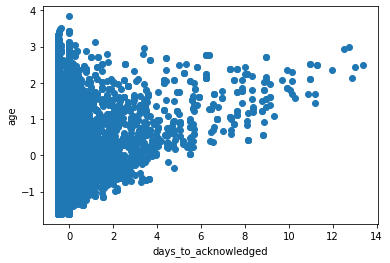

In [75]:
#pairplot - go through most numerical column from pairplot to analyze
#create new columns from any relationships between columns and remove old columns?
#remove one column from high corr relationship (without creating new column)?
import matplotlib.pyplot as plt
import numpy as np
x=test_df['days_to_acknowledged']
y=test_df['age']
plt.scatter(x, y)
plt.xlabel('days_to_acknowledged')
plt.ylabel('age')
plt.show()

6. Use feature selection algorithm

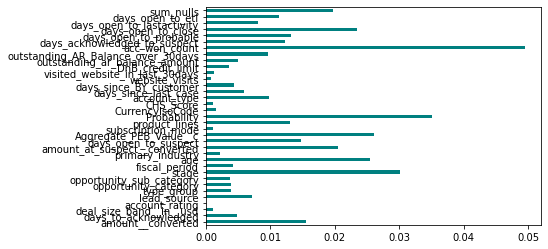

In [70]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(df_merged.loc[:, df_merged.columns!='target'],df_merged['target'])
feat_importances = pd.Series(importances, df_merged.columns[~df_merged.columns.isin(['target'])])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

7. KNN algorithm

Text(0, 0.5, 'Error Rate')

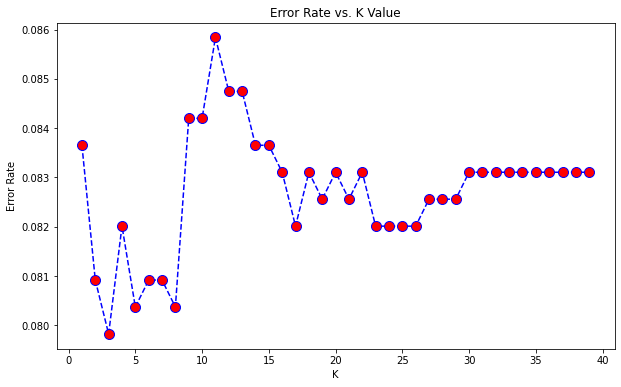

In [41]:
from sklearn.neighbors import KNeighborsClassifier
filter_features = feat_importances[feat_importances>0.001].index.tolist()
#elbow plot for knn
error_rate = []
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_merged[filter_features], df_merged['target'])
    pred_i = knn.predict(df_merged_test[filter_features])
    error_rate.append(np.mean(pred_i != df_merged_test['target']))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
#takes too long
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV

#parameters = {'n_neighbors':list(range(1, 15)), 'weights':('uniform', 'distance'), 'algorithm':('ball_tree', 'kd_tree', 'brute')}
#gscvclf = GridSearchCV(KNeighborsClassifier(), parameters, scoring='precision')
#gscvclf.fit(df_merged[filter_features][:15000], df_merged['target'][:15000])
#print(gscvclf.best_score_)
#print(gscvclf.best_params_)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=6, weights='uniform', algorithm='ball_tree')
neigh.fit(df_merged[filter_features], df_merged['target'])

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)

In [44]:
neigh.score(df_merged_test[filter_features], df_merged_test['target'])

0.9190814652815746

In [45]:
from sklearn.metrics import precision_score
predictions = neigh.predict(df_merged_test[filter_features])
precision_score(df_merged_test['target'],predictions)

0.75

8. Decision Tree Algorithm

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy', 'log_loss')}
gscvclf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='precision')
gscvclf.fit(df_merged[filter_features], df_merged['target'])
print(gscvclf.best_score_)
print(gscvclf.best_params_)

0.40089603162779497
{'criterion': 'log_loss'}


In [47]:
from sklearn.model_selection import cross_val_score
dtclf = DecisionTreeClassifier(criterion='log_loss')
print(cross_val_score(dtclf, df_merged[filter_features], df_merged['target'], cv=10))
dtclf.fit(df_merged[filter_features], df_merged['target'])
print(dtclf.score(df_merged_test[filter_features], df_merged_test['target']))

[0.96754337 0.95858982 0.94404029 0.93844432 0.91941802 0.91773923
 0.83827644 0.95187465 0.95352744 0.95352744]
0.9179879715691635


In [48]:
predictionsdt = dtclf.predict(df_merged_test[filter_features])
precision_score(df_merged_test['target'],predictionsdt)

0.5344827586206896

10. Gradient Boosting Classifier

In [49]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV

# parameters = dict(loss=['log_loss', 'exponential'],learning_rate=[x / 10.0 for x in range(1, 6, 1)],n_estimators=list(range(10,60,10)),criterion=['friedman_mse','squared_error'],max_depth=list(range(1,6,1)))
# #gscvclf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, scoring='precision', n_iter=50)
# gscvclf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='precision')
# gscvclf.fit(df_merged[filter_features], df_merged['target'])
# print(gscvclf.best_score_)
# print(gscvclf.best_params_)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(loss='log_loss',n_estimators=40, learning_rate=0.1,max_depth=3)
print(cross_val_score(gbclf, df_merged[filter_features], df_merged['target'], cv=10))
gbclf.fit(df_merged[filter_features], df_merged['target'])
print(gbclf.score(df_merged_test[filter_features], df_merged_test['target']))

[0.96642417 0.97313934 0.96698377 0.96866256 0.96418579 0.97146055
 0.87353106 0.86010073 0.97480403 0.96640538]
0.9190814652815746


0.5882352941176471


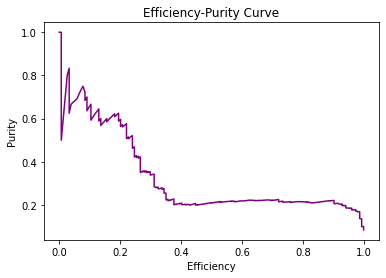

In [51]:
predictionsgb = gbclf.predict(df_merged_test[filter_features])
print(precision_score(df_merged_test['target'],predictionsgb))

#these efficiency-purity curves appear to be based on different thresholds for the same set of predictions while keeping hyperparameters constant?
#these results perhaps indicate that some feature engineering and/or feature scaling needs to be done.
from sklearn.metrics import precision_recall_curve
y_score = gbclf.predict_proba(df_merged_test[filter_features])[:,1]
precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

11. Neural Network

In [52]:
# first neural network with keras make predictions
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 2ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


In [54]:
# first neural network with keras make predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X=df_merged[filter_features]
y=df_merged['target']
X_test=df_merged_test[filter_features]

# define the keras model
nnclf = Sequential()
nnclf.add(Dense(12, input_shape=(35,), activation='relu'))
nnclf.add(Dense(8, activation='relu'))
nnclf.add(Dense(1, activation='sigmoid'))
# compile the keras model
nnclf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
nnclf.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (nnclf.predict(X_test) > 0.5).astype(int)

58/58 [==============================] - 0s 2ms/step


0.4888888888888889
58/58 [==============================] - 0s 1ms/step


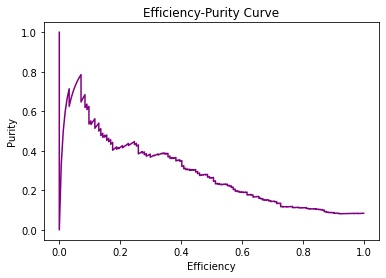

In [55]:
print(precision_score(df_merged_test['target'],predictions))
y_score = nnclf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

In [56]:
#feature scaling
#test different hyperparameters and different features
#combine algorithms - use outputs from individuals models as inputs for combined models. Which features perform best for which models?

In [58]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(df_merged[filter_features], df_merged['target'])
y_pred = gnb.predict(df_merged_test[filter_features])
y_pred
from sklearn.metrics import accuracy_score
print('Model precision score: {0:0.4f}'. format(precision_score(df_merged_test['target'], y_pred)))

Model precision score: 0.3006


In [59]:
# parameters = dict(penalty=['l1', 'l2', 'elasticnet', 'none'],C=[x / 10.0 for x in range(1, 21, 1)],solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
# #gscvclf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, scoring='precision', n_iter=50)
# gscvclf = GridSearchCV(LogisticRegression(), parameters, scoring='precision')
# gscvclf.fit(df_merged[filter_features], df_merged['target'])
# print(gscvclf.best_score_)
# print(gscvclf.best_params_)

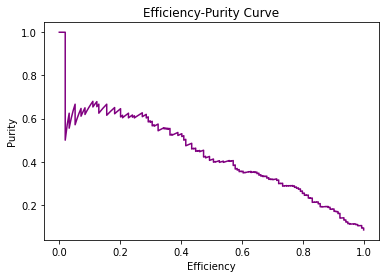

0.6538461538461539


In [60]:
#Logistic Regression - appears to perform better after scaling

from sklearn.linear_model import LogisticRegression
logregclf = LogisticRegression(C=0.2,penalty='l1',solver='liblinear')
logregclf.fit(df_merged[filter_features], df_merged['target'])
y_score = logregclf.predict_proba(df_merged_test[filter_features])[:,1]

precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

y_pred = logregclf.predict(df_merged_test[filter_features])
print(precision_score(df_merged_test['target'], y_pred))

In [61]:
# from sklearn.ensemble import RandomForestClassifier
# parameters = dict(n_estimators=list(range(10,110,10)),criterion=['gini', 'entropy', 'log_loss'])
# #gscvclf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, scoring='precision', n_iter=50)
# gscvclf = GridSearchCV(RandomForestClassifier(), parameters, scoring='precision')
# gscvclf.fit(df_merged[filter_features], df_merged['target'])
# print(gscvclf.best_score_)
# print(gscvclf.best_params_)

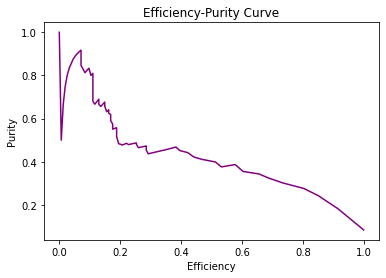

0.7083333333333334


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(criterion='log_loss', n_estimators=100)
rfclf.fit(df_merged[filter_features], df_merged['target'])
y_score = rfclf.predict_proba(df_merged_test[filter_features])[:,1]

precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

y_pred = rfclf.predict(df_merged_test[filter_features])
print(precision_score(df_merged_test['target'], y_pred))

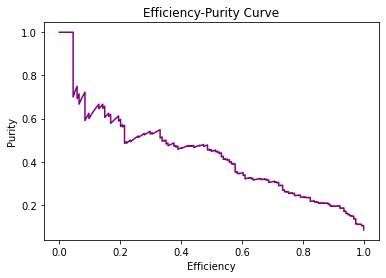

0.6216216216216216


In [65]:
#Voting Classifier

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(C=0.2,penalty='l1',solver='liblinear')
clf2 = RandomForestClassifier(criterion='log_loss', n_estimators=100)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(loss='log_loss',n_estimators=40, learning_rate=0.1,max_depth=3)
clf5 = KNeighborsClassifier(n_neighbors=6) #seems to perform better in voting classifier with 3 neighbours as opposed to 8.
#clf6 = DecisionTreeClassifier(random_state=0) #appears to provide worse performance

votclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('gb', clf4), ('knn', clf5)], voting='soft')
votclf = votclf.fit(df_merged[filter_features], df_merged['target'])

y_score = votclf.predict_proba(df_merged_test[filter_features])[:,1]
precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

y_pred = votclf.predict(df_merged_test[filter_features])
print(precision_score(df_merged_test['target'], y_pred))

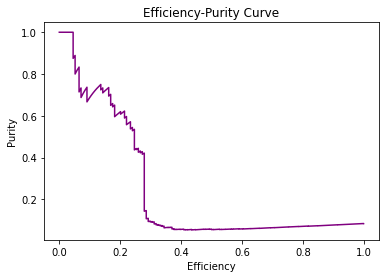

0.7241379310344828


In [66]:
#stacking classifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression(C=0.2,penalty='l1',solver='liblinear')
clf2 = RandomForestClassifier(criterion='log_loss', n_estimators=100)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(loss='log_loss',n_estimators=40, learning_rate=0.1,max_depth=3)
clf5 = KNeighborsClassifier(n_neighbors=6)

estimators = [('lg',clf1),('rf',clf2),('gnb',clf3),('gb',clf4),('knn',clf5)]

stackclf = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True))
stackclf = stackclf.fit(df_merged[filter_features], df_merged['target'])

y_score = stackclf.predict_proba(df_merged_test[filter_features])[:,1]
precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')

#display plot
plt.show()

y_pred = stackclf.predict(df_merged_test[filter_features])
print(precision_score(df_merged_test['target'], y_pred))

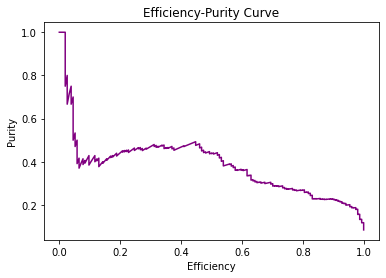

0.5
Accuracy: 0.9158009841443412


In [67]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier



# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



from sklearn.metrics import precision_recall_curve



#svc=SVC(probability=True, kernel='linear')
#svc=SVC(probability=True,kernel='poly', degree=8)
svc=SVC(probability=True,kernel='rbf')
#from sklearn.naive_bayes import GaussianNB
# instantiate the model
#gnb = GaussianNB()



#from sklearn.neighbors import KNeighborsClassifier
#neigh = KNeighborsClassifier(n_neighbors=8)



# Create adaboost classifer object
#abc =AdaBoostClassifier(n_estimators=100, base_estimator=svc,learning_rate=0.01)
#abc =AdaBoostClassifier(n_estimators=150, base_estimator=svc,learning_rate=0.01)
abc =AdaBoostClassifier(n_estimators=170, base_estimator=svc,learning_rate=0.01)
# Train Adaboost Classifer
abc.fit(df_merged[filter_features], df_merged['target'])



#Predict the response for test dataset
y_score = abc.predict(df_merged_test[filter_features])


y_prob = abc.predict_proba(df_merged_test[filter_features])[:,1]
precision, recall, thresholds = precision_recall_curve(df_merged_test['target'], y_prob)



#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')



#add axis labels to plot
ax.set_title('Efficiency-Purity Curve')
ax.set_ylabel('Purity')
ax.set_xlabel('Efficiency')



#display plot
plt.show()



#y_pred = clf.predict(df_merged[filter_features][15000:])
print(precision_score(df_merged_test['target'], y_score))



# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score((df_merged_test['target']), y_score))

58/58 [==============================] - 0s 2ms/step
       y  Logistic Regression  Random Forest  Neural Network   Stacking  \
19818  1            98.026437           90.0       98.869141  86.244955   
19785  1            97.005385           48.0       87.191948  69.754466   
19810  1            96.995428           60.0       86.222824  79.612839   
19784  0            96.892902           44.0       84.850708  60.774701   
19849  0            94.232633           65.0       88.032944  81.687043   

          Voting  Gradient Boosting  Decision Tree  K nearest neighbour  \
19818  83.123691          85.591986          100.0            50.000000   
19785  74.724330          77.616233          100.0            50.000000   
19810  76.122338          77.616233          100.0            50.000000   
19784  73.101833          77.616233          100.0            50.000000   
19849  72.096258          86.581955            0.0            16.666667   

        AdaBoost  count  efficiency  purity  

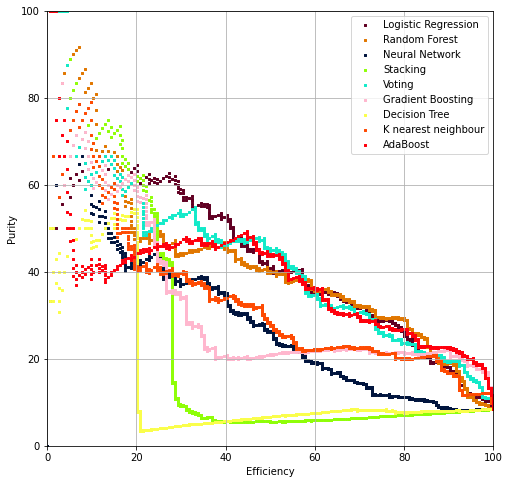

In [68]:
#combiing all graphs
fig = plt.figure(figsize=(8,8))
ax = plt.subplot()

y = df_merged_test['target']
df_ = pd.DataFrame({'y': y})
logregprobs = logregclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Logistic Regression'] = logregprobs
rfprobs = rfclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Random Forest'] = rfprobs
nnprobs = nnclf.predict(df_merged_test[filter_features])*100.
df_['Neural Network'] = nnprobs
stackprobs = stackclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Stacking'] = stackprobs
votprobs = votclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Voting'] = votprobs
gbprobs = gbclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Gradient Boosting'] = gbprobs
dtprobs = dtclf.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['Decision Tree'] = dtprobs
neighprobs = neigh.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['K nearest neighbour'] = neighprobs
abcprobs = abc.predict_proba(df_merged_test[filter_features])[:,1]*100.
df_['AdaBoost'] = abcprobs

colors = ['xkcd:burgundy', 'xkcd:pumpkin', 'xkcd:navy', '#8ffe09', '#13eac9', '#ffb7ce', '#fafe4b', '#fe4b03', '#ff000d']
for c,model in enumerate(['Logistic Regression', 'Random Forest', 'Neural Network', 'Stacking', 'Voting', 'Gradient Boosting', 'Decision Tree', 'K nearest neighbour', 'AdaBoost']):    
    df_ = df_.sort_values(by=model, ascending=False)
    df_['count'] = 1
    df_['count'] = df_['count'].cumsum()
    df_['efficiency'] = df_['y'].cumsum()/df_['y'].sum()*100.
    df_['purity'] = df_['y'].cumsum()/df_['count']*100.
    print(df_.head())
    plt.scatter(df_.efficiency, df_.purity, marker=',',s=5, label=model, color=colors[c])
plt.grid()
plt.legend()
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.set_xlabel('Efficiency')
ax.set_ylabel('Purity')
plt.savefig('pureff2.png')

In [ ]:
#possibilities
#1. Issue in feature engineering
#2. Issue in ML algorithm used
#3. Data distribution issue.
#4. No possibility for good result
#5. slowly increase number of features and observe accuracy rate.
#6. output should be probability format for graphing results?